<a href="https://colab.research.google.com/github/Rezalnik/test/blob/main/%D0%B4%D0%B0%D1%82%D0%B0%D1%81%D0%B5%D1%82_%D1%81%D1%82%D0%BE%D0%B8%D0%BC%D0%BE%D1%81%D1%82%D1%8C_%D0%B0%D0%BB%D0%BC%D0%B0%D0%B7%D0%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Анализ и предварительная обработка данных

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Задание 1

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
diamonds = pd.read_csv("/content/drive/MyDrive/diamonds.csv", sep=",", encoding="cp866") # загружаем датасет из гугл диска

In [ ]:
#diamonds = pd.read_csv('diamonds.csv') # загрузка датасета из устройства
diamonds = diamonds.drop(labels="Unnamed: 0", axis=1) # удалим столбец индексов
diamonds.head(10)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
5,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
6,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47
7,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53
8,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49
9,0.23,Very Good,H,VS1,59.4,61.0,338,4.00,4.05,2.39


## Задание 2

**Описание датасета**

  1)carat: numeric; 0 - 5.01

  2)cut: nominal; Fair, Good, Ideal, Premium, Very Good

  3)color: nominal; D, E, F, G, H, I, J

  4)clarity: nominal; I1, IF, SI1, SI2, VS1, VS2, VVS1,VVS2

  5)depth: numeric; 43 - 79

  6)table: numeric; 43 - 95

  7)price: numeric; 326 - 18,823

  8)x: numeric; 0 - 10.74

  9)y: numeric; 0 - 58.9

  10)z: numeric;  0 - 31.8

In [ ]:
diamonds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [ ]:
diamonds.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


<Axes: >

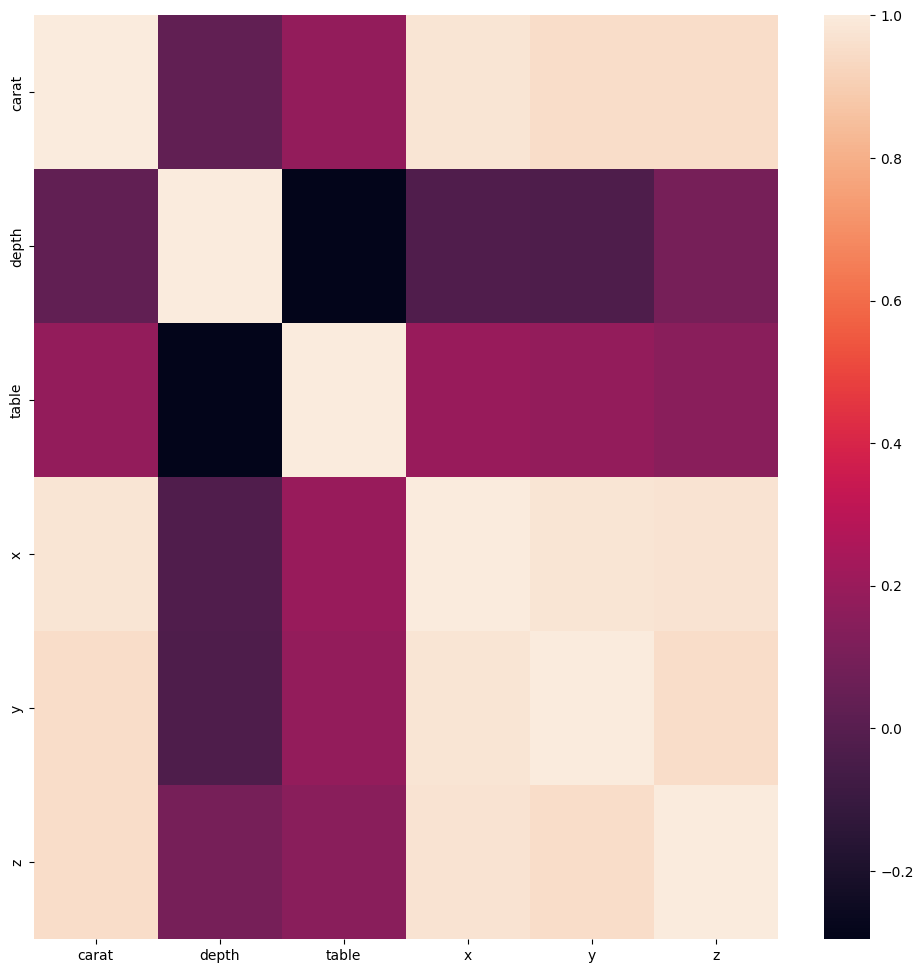

In [ ]:
# тепловая карта, по ней можно заметить, что признаки "x", "y", "z" сильно взаимосвязаны
numeric_cols = ["carat",
"depth",
"table",
"x",
"y",
"z"]
df_numeric = diamonds[numeric_cols].dropna()
ax, fig = plt.subplots(figsize=[12,12])
sns.heatmap(df_numeric.corr())


In [ ]:
diamonds.corr()

<ipython-input-8-1193364b961e>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  diamonds.corr()


,carat,depth,table,price,x,y,z
carat,1.000000,0.028224,0.181618,0.921591,0.975094,0.951722,0.953387
depth,0.028224,1.000000,-0.295779,-0.010647,-0.025289,-0.029341,0.094924
table,0.181618,-0.295779,1.000000,0.127134,0.195344,0.183760,0.150929
price,0.921591,-0.010647,0.127134,1.000000,0.884435,0.865421,0.861249
x,0.975094,-0.025289,0.195344,0.884435,1.000000,0.974701,0.970772
y,0.951722,-0.029341,0.183760,0.865421,0.974701,1.000000,0.952006
z,0.953387,0.094924,0.150929,0.861249,0.970772,0.952006,1.000000


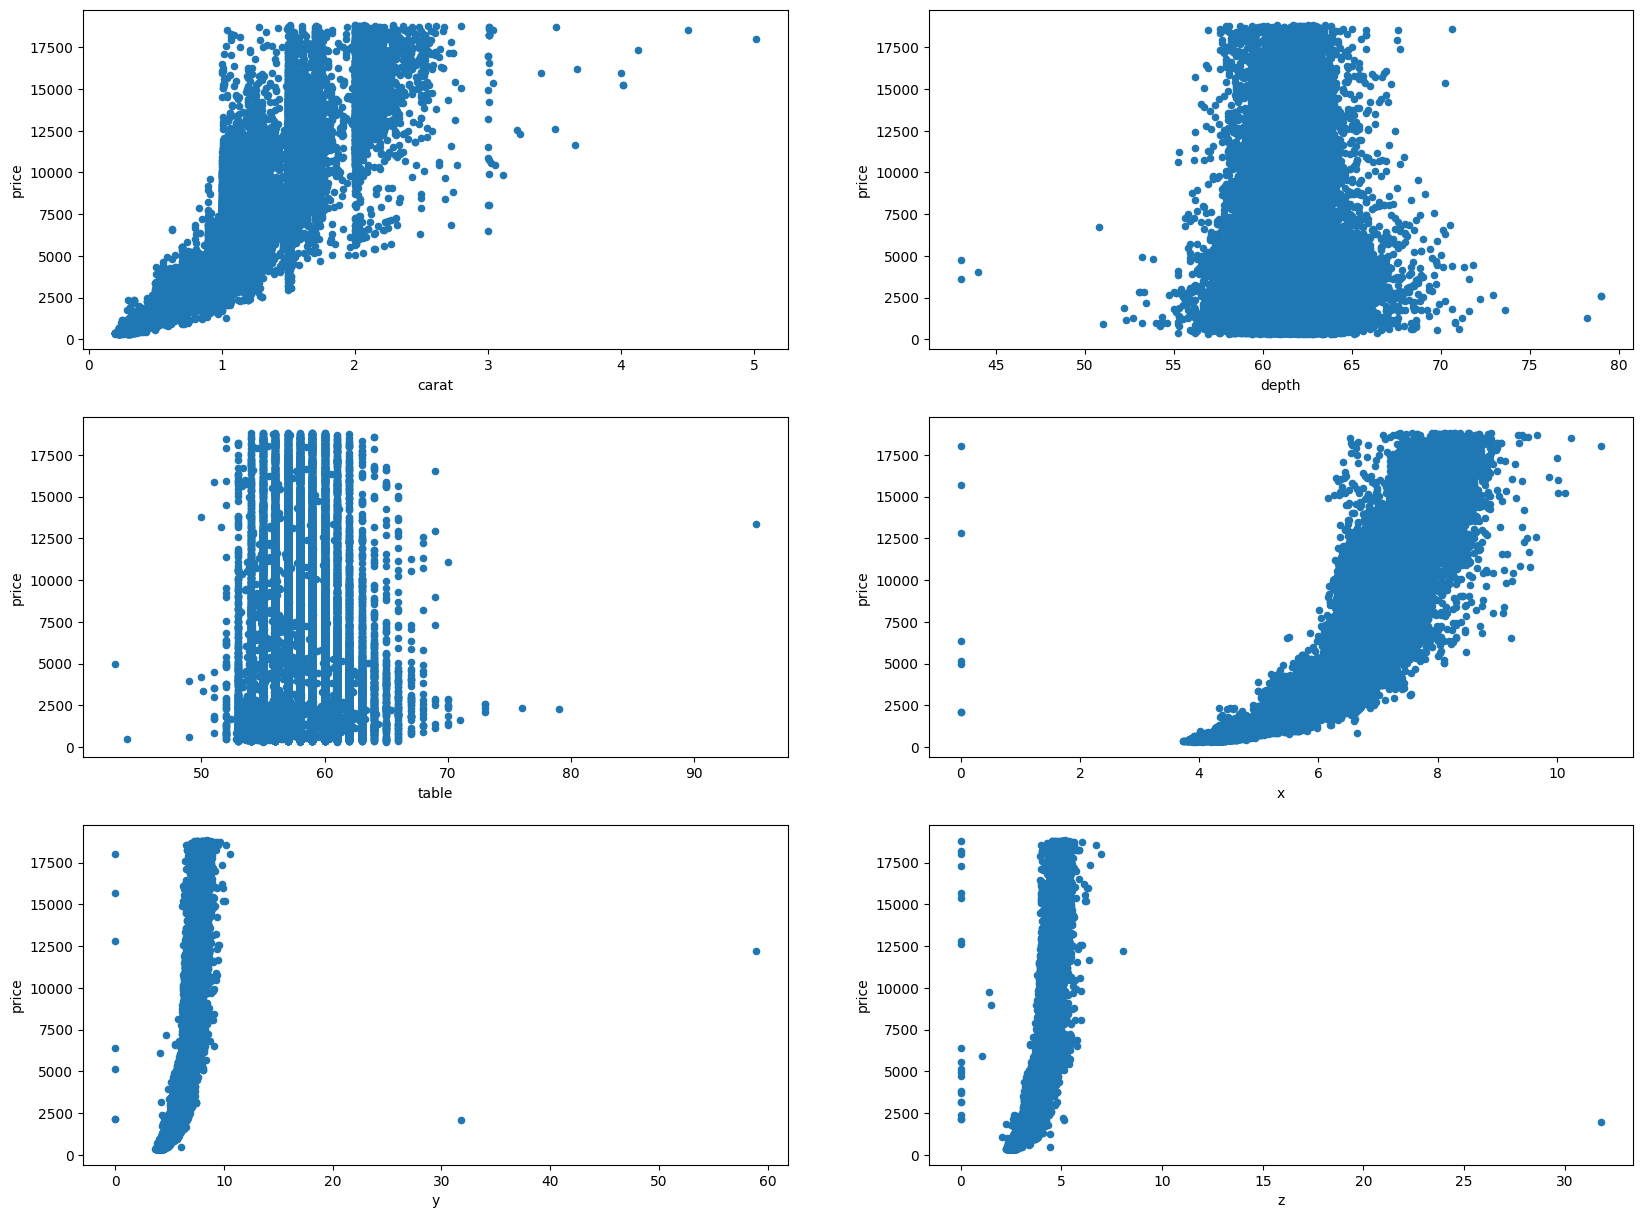

In [ ]:
# зависимость целевого признака от числовых признаков
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(20, 15))
for idx, feature in enumerate(diamonds[numeric_cols]):
    diamonds.plot(feature, "price", subplots=True, kind="scatter", ax=axes[idx // 2, idx % 2])

## Задание 3

In [ ]:
#Заменим все пустые значения в числовых признаках на среднее
diamonds[numeric_cols] = diamonds[numeric_cols].transform(lambda x: x.fillna(x.mean())) # transform() - изменить по определенному правилу

## Задание 4

In [ ]:
diamonds = pd.get_dummies(diamonds, columns = ['cut',"color","clarity"]) # One Hot Encoding
diamonds

,carat,depth,table,price,x,y,z,cut_Fair,cut_Good,cut_Ideal,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,61.5,55.0,326,3.95,3.98,2.43,0,0,1,...,0,0,0,0,0,1,0,0,0,0
1,0.21,59.8,61.0,326,3.89,3.84,2.31,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0.23,56.9,65.0,327,4.05,4.07,2.31,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,0.29,62.4,58.0,334,4.20,4.23,2.63,0,0,0,...,1,0,0,0,0,0,0,1,0,0
4,0.31,63.3,58.0,335,4.34,4.35,2.75,0,1,0,...,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2757,5.75,5.76,3.50,0,0,1,...,0,0,0,0,1,0,0,0,0,0
53936,0.72,63.1,55.0,2757,5.69,5.75,3.61,0,1,0,...,0,0,0,0,1,0,0,0,0,0
53937,0.70,62.8,60.0,2757,5.66,5.68,3.56,0,0,0,...,0,0,0,0,1,0,0,0,0,0
53938,0.86,61.0,58.0,2757,6.15,6.12,3.74,0,0,0,...,0,0,0,0,0,1,0,0,0,0


## Задание 5

In [ ]:
diamonds.isnull().sum() # количество пропущенных значений в каждом признаке

carat            0
depth            0
table            0
price            0
x                0
y                0
z                0
cut_Fair         0
cut_Good         0
cut_Ideal        0
cut_Premium      0
cut_Very Good    0
color_D          0
color_E          0
color_F          0
color_G          0
color_H          0
color_I          0
color_J          0
clarity_I1       0
clarity_IF       0
clarity_SI1      0
clarity_SI2      0
clarity_VS1      0
clarity_VS2      0
clarity_VVS1     0
clarity_VVS2     0
dtype: int64

In [ ]:
diamonds.dtypes # тип данных у каждого признака

carat            float64
depth            float64
table            float64
price              int64
x                float64
y                float64
z                float64
cut_Fair           uint8
cut_Good           uint8
cut_Ideal          uint8
cut_Premium        uint8
cut_Very Good      uint8
color_D            uint8
color_E            uint8
color_F            uint8
color_G            uint8
color_H            uint8
color_I            uint8
color_J            uint8
clarity_I1         uint8
clarity_IF         uint8
clarity_SI1        uint8
clarity_SI2        uint8
clarity_VS1        uint8
clarity_VS2        uint8
clarity_VVS1       uint8
clarity_VVS2       uint8
dtype: object

## Задание 6

In [ ]:
diamonds.to_csv('result_diamonds.csv') # сохраняем данные в csv файл

In [ ]:
diamonds.to_csv("/content/drive/MyDrive/result_diamonds.csv", sep=",", encoding="cp866")

# Моделирование (Обучение и оценивание моделей)

In [ ]:
import pandas as pd

## Задание 1

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
result_diamonds = pd.read_csv("/content/drive/MyDrive/result_diamonds.csv", sep=",", encoding="cp866") # загружаем изменённый датасет из гугл диска

In [ ]:
result_diamonds = result_diamonds.drop(labels="Unnamed: 0", axis=1)
result_diamonds

,carat,depth,table,price,x,y,z,cut_Fair,cut_Good,cut_Ideal,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,61.5,55.0,326,3.95,3.98,2.43,0,0,1,...,0,0,0,0,0,1,0,0,0,0
1,0.21,59.8,61.0,326,3.89,3.84,2.31,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0.23,56.9,65.0,327,4.05,4.07,2.31,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,0.29,62.4,58.0,334,4.20,4.23,2.63,0,0,0,...,1,0,0,0,0,0,0,1,0,0
4,0.31,63.3,58.0,335,4.34,4.35,2.75,0,1,0,...,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2757,5.75,5.76,3.50,0,0,1,...,0,0,0,0,1,0,0,0,0,0
53936,0.72,63.1,55.0,2757,5.69,5.75,3.61,0,1,0,...,0,0,0,0,1,0,0,0,0,0
53937,0.70,62.8,60.0,2757,5.66,5.68,3.56,0,0,0,...,0,0,0,0,1,0,0,0,0,0
53938,0.86,61.0,58.0,2757,6.15,6.12,3.74,0,0,0,...,0,0,0,0,0,1,0,0,0,0


## Задание 2

In [ ]:
y = result_diamonds["price"] # целевой признак
y

0         326
1         326
2         327
3         334
4         335
         ... 
53935    2757
53936    2757
53937    2757
53938    2757
53939    2757
Name: price, Length: 53940, dtype: int64

In [ ]:
X = result_diamonds.drop(columns = ["price"]) # матрица X
X

,carat,depth,table,x,y,z,cut_Fair,cut_Good,cut_Ideal,cut_Premium,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,61.5,55.0,3.95,3.98,2.43,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
1,0.21,59.8,61.0,3.89,3.84,2.31,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
2,0.23,56.9,65.0,4.05,4.07,2.31,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0.29,62.4,58.0,4.20,4.23,2.63,0,0,0,1,...,1,0,0,0,0,0,0,1,0,0
4,0.31,63.3,58.0,4.34,4.35,2.75,0,1,0,0,...,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,5.75,5.76,3.50,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
53936,0.72,63.1,55.0,5.69,5.75,3.61,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
53937,0.70,62.8,60.0,5.66,5.68,3.56,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
53938,0.86,61.0,58.0,6.15,6.12,3.74,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0


## Задание 3

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((40455, 26), (40455,), (13485, 26), (13485,))

## Задание 4

In [ ]:
from sklearn.preprocessing import StandardScaler

X_train = StandardScaler().fit_transform(X_train)
X_test = StandardScaler().fit_transform(X_test)



## Задание 5 и 6

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor, GradientBoostingRegressor

from sklearn.model_selection import GridSearchCV

In [ ]:
# Lasso - линейная регрессия с L1-регуляризацией
parameters = {'alpha': [0.25, 0.5, 0.75, 1]}

lasso = GridSearchCV(Lasso(), parameters).fit(X_train, y_train)
print(lasso.best_params_)

print(lasso.score(X_test, y_test)) # коэффицент детерминации
print(mean_absolute_error(y_test, lasso.predict(X_test))) # MAE
print(mean_squared_error(y_test, lasso.predict(X_test))) # MSE

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.709e+08, tolerance: 5.179e+07
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.658e+08, tolerance: 5.165e+07
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.687e+08, tolerance: 5.213e

{'alpha': 0.5}
0.9202200788705474
733.6048695896708
1241668.9997485348


In [ ]:
# Ridge - линейная регрессия с L2-регуляризацией
parameters = {'alpha': np.arange(0, 1, 0.1)}

ridge = GridSearchCV(Ridge(), parameters).fit(X_train, y_train)
print(ridge.best_params_)

print(ridge.score(X_test, y_test)) # коэффицент детерминации
print(mean_absolute_error(y_test, ridge.predict(X_test))) # MAE
print(mean_squared_error(y_test, ridge.predict(X_test))) # MSE

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=2.2813e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=4.36584e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


{'alpha': 0.0}
-4.5031896766649045e+22
722693787058998.1
7.008619389870785e+29


In [ ]:
# DecisionTreeRegressor - регрессор на основе дерева решений
parameters = {'max_features': [5, 10, 15, 20, 25, 30, 35, 40],
              'max_depth': [1, 2, 3, 4,  5, 6,  7, 8, 9, 10, 11, 12, 13, 14, 15]}

dt = GridSearchCV(DecisionTreeRegressor(), parameters).fit(X_train, y_train)
print(dt.best_params_)

print(dt.score(X_test, y_test)) # коэффицент детерминации
print(mean_absolute_error(y_test, dt.predict(X_test))) # MAE
print(mean_squared_error(y_test, dt.predict(X_test))) # MSE

{'max_depth': 13, 'max_features': 30}
0.9646686330115699
379.8298993153156
549886.0175242372


In [ ]:
# BaggingRegressor - регрессор на основе ансамбля деревьев, обученного с помощью бэггинга
parameters = {'max_samples': np.arange(0, 1, 0.1), 'max_features': np.arange(0, 1, 0.1)}

bag = GridSearchCV(BaggingRegressor(), parameters, n_jobs=-1).fit(X_train, y_train)
print(bag.best_params_)

print(bag.score(X_test, y_test))
print(mean_absolute_error(y_test, bag.predict(X_test)))
print(mean_squared_error(y_test, bag.predict(X_test)))

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
95 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
50 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_bagging.py", line 326, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/uti

{'max_features': 0.9, 'max_samples': 0.7000000000000001}
0.9753404287673642
324.3629795186892
383793.6251775873


In [ ]:
import tensorflow as tf

In [ ]:
model_regression = tf.keras.Sequential(
    [
        tf.keras.layers.Dense(64, activation="relu", input_shape=(26,)),
        tf.keras.layers.Dense(128, activation="linear"),
        tf.keras.layers.Dropout(0.05),
        tf.keras.layers.Dense(256, activation="relu"),
        tf.keras.layers.Dropout(0.025),
        tf.keras.layers.Dense(128, activation="linear"),
        tf.keras.layers.Dropout(0.05),
        tf.keras.layers.Dense(64, activation="relu"),
        tf.keras.layers.Dense(32, activation="linear"),
        # на выходе один нейрон
        tf.keras.layers.Dense(1, activation="linear"),
    ]
)
model_regression.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), loss="mse")
model_regression.fit(X_train, y_train, epochs=50, verbose=None)
print(mean_absolute_error(y_test, model_regression.predict(X_test, verbose=None)))
print(mean_squared_error(y_test, model_regression.predict(X_test, verbose=None)))


371.43917139468476
428195.5214243651


In [ ]:
print(model_regression.evaluate(X_test, y_test ))

422/422 [==============================] - 1s 1ms/step - loss: 428195.5625
428195.5625


## задание 7

Самой оптимальной оказалось модель BaggingRegressor, так как у неё коэффицент детерминации самый большой: 0.9778933108519164

## задание 8

In [ ]:
result_diamonds.to_csv('result2_diamonds.csv') # сохраняем данные в csv файл

In [ ]:
result_diamonds.to_csv("/content/drive/MyDrive/result2_diamonds.csv", sep=",", encoding="cp866")

In [ ]:
import pickle

In [ ]:
pickle.dump(bag, open('/content/drive/MyDrive/gradient_boosting.sav', 'wb'))

# Инференс (создание дашборда с использованием выбранной модели)

In [ ]:
!pip install -q numpy pandas scikit-learn streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 84.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 kB 20.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 95.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 164.8/164.8 kB 15.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 6.2 MB/s eta 0:00:00


In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# путь до файла с предобработанными данными в формате csv
result_diamonds = "/content/drive/MyDrive/result_diamonds.csv"

# путь до файла с сериализованной моделью
gradient_boosting = "/content/drive/MyDrive/gradient_boosting.sav"

In [ ]:
result_diamonds

'/content/drive/MyDrive/result_diamonds.csv'

In [ ]:
gradient_boosting

'/content/drive/MyDrive/gradient_boosting.sav'

In [ ]:
import os


id_slice = slice(32, 65)

data_file_id = result_diamonds[id_slice]
model_file_id = gradient_boosting[id_slice]

os.system(f"wget -q -O preprocessed_data.csv https://drive.google.com/uc?id={data_file_id}")
os.system(f"wget -q -O model.pkl https://drive.google.com/uc?id={model_file_id}")

2048

In [ ]:
%%writefile app.py
import pickle

import pandas as pd
import numpy as np
import streamlit as st


def main():
    model = load_model("model.pkl")
    test_data = load_test_data("preprocessed_data.csv")

    page = st.sidebar.selectbox(
        "Выберите страницу",
        ["Описание задачи и данных", "Запрос к модели"]
    )

    if page == "Описание задачи и данных":
        st.title("Описание задачи и данных")
        st.write("Выберите страницу слева")

        st.header("Описание задачи")





        #st.markdown("""Хочешь купить алмаз тогда идите к нам""")

        st.header("Описание данных")
        st.markdown("""Предоставленные данные:
* User_ID – идентификатор покупателя.

К категориальным признакам относятся:
* красный алмаз,
* зелёный алмаз,
* жёлтый алмаз.""")







    elif page == "Запрос к модели":
        st.title("Запрос к модели")
        st.write("Выберите страницу слева")
        request = st.selectbox(
            "Выберите запрос",
            ["RMSE", "Первые 5 предсказанных значений", "Пользовательский пример", "Пасхалка"]
        )

        if request == "RMSE":
            st.header("Корень из среднеквадратичной ошибки")
            rmse = 3006.55  # Костыль! Заменить на настоящий подсчёт метрики
            st.write(f"{rmse}")
        elif request == "Первые 5 предсказанных значений":
            st.header("Первые 5 предсказанных значений")
            first_5_test = test_data.iloc[:5, :]
            first_5_pred = model.predict(first_5_test)
            for item in first_5_pred:
                st.write(f"{item:.2f}")
        elif request == "Пользовательский пример":
            st.header("Пользовательский пример")

            gender = st.selectbox("Пол", ['М', 'Ж'])
            gender = 0 if gender == 'М' else 1

            age = st.number_input("Возраст", 0, 100)
            age = 0 if age >= 55 else 1

            city = st.selectbox("Город", ['A', 'B', 'C'])
            city = 0 if city == 'C' else 1

            stay_in_city = st.selectbox("Количество лет в городе", ['1', '2', '3', '4+'])
            stay_in_city = 0 if stay_in_city == '4+' else 1

            marital_status = st.selectbox("Семейное положение (в браке - 1, иначе - 0)", [0, 1])
            marital_status = int(marital_status)

            occupation = st.number_input("Код профессии от 0 до 20", 0, 19)
            one_hot_occup = []
            for num in range(0, 20):
                if num == occupation:
                    one_hot_occup.append(1)
                else:
                    one_hot_occup.append(0)

            category = st.number_input("Категория  от 0 до 20", 0, 20)
            one_hot_cat = []
            for num in range(0, 21):
                if num == category:
                    one_hot_cat.append(1)
                else:
                    one_hot_cat.append(0)

            if st.button('Предсказать'):
                data = [gender, age, city, stay_in_city, marital_status]
                for item in one_hot_occup + one_hot_cat:
                    data.append(item)
                data = np.array(data).reshape((1, -1))
                pred = model.predict(data)
                st.write(f"Предсказанное значение: {pred[0]:.2f}")
            else:
                pass

        elif request == "Пасхалка":
            st.header("Пасхалка")
            st.write(":)")


@st.cache_data
def load_model(path_to_file):
    with open(path_to_file, 'rb') as model_file:
        model = pickle.load(model_file)
    return model


@st.cache_data
def load_test_data(path_to_file):
    df = pd.read_csv(path_to_file, index_col='Unnamed: 0')
    df = df.drop(labels=['Product_ID'], axis=1)
    return df


if __name__ == "__main__":
    main()

Writing app.py


текст

In [ ]:
!npm install localtunnel

npm WARN saveError ENOENT: no such file or directory, open '/content/package.json'
npm notice created a lockfile as package-lock.json. You should commit this file.
npm WARN enoent ENOENT: no such file or directory, open '/content/package.json'
npm WARN content No description
npm WARN content No repository field.
npm WARN content No README data
npm WARN content No license field.

+ localtunnel@2.0.2
added 22 packages from 22 contributors and audited 22 packages in 1.774s

3 packages are looking for funding
  run `npm fund` for details

found 0 vulnerabilities



In [ ]:
!streamlit run /content/app.py &>/content/logs.txt &

In [ ]:
!npx localtunnel --port 8501

npx: installed 22 in 1.431s
your url is: https://spicy-baths-listen-34-86-61-8.loca.lt
^C
